# Neighborhoods Data Analysis of Toronto and Istanbul

### By: Mehmet Fatih Üstek

# 1.0 Introduction
## 1.1 Background
   **Toronto** is the capital city of the Canadian province of Ontario. With a recorded population of approximately 2.7 million in 2016, it is the most populous city in Canada and the fourth most populous city in North America. The diverse population of Toronto reflects its current and historical role as an important destination for immigrants to Canada. More than 50 percent of residents belong to a visible minority population group, and over 200 distinct ethnic origins are represented among its inhabitants. Toronto is an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world. Toronto covers an area of 630 square kilometres (243 sq mi), with a maximum north–south distance of 21 km (13 mi). It has a maximum east–west distance of 43 km (27 mi) and it has a 46-kilometre (29 mi) long waterfront shoreline, on the northwestern shore of Lake Ontario. Toronto encompasses a geographical area formerly administered by many separate municipalities. These municipalities have each developed a distinct history and identity over the years, and their names remain in common use among Torontonians. Former municipalities include East York, Etobicoke, Forest Hill, Mimico, North York, Parkdale, Scarborough, Swansea, Weston and York. Throughout the city there exist hundreds of small neighbourhoods and some larger neighbourhoods covering a few square kilometres.

   **Istanbul** is one of the largest metropolises in the world where over 15 million people live and it has a population density of 2.813 people per square kilometer. As a resident of this city, I decided to use Istanbul in my project. The city is divided into 39 districts in total. However, the fact that the districts are squeezed into an area of approximately 72 square kilometers causes the city to have a very intertwined and mixed structure. As you can see from the figures, Istanbul is a city with a high population and population density. Being such a crowded city leads the owners of shops and social sharing places in the city where the population is dense. When we think of it by the investor, we expect from them to prefer the districts where there is a lower real estate cost and the type of business they want to install is less intense. If we think of the city residents, they may want to choose the regions where real estate values are lower, too. At the same time, they may want to choose the district according to the social places density. However, it is difficult to obtain information that will guide investors in this direction, nowadays. When we consider all these problems, we can create a map and information chart where the real estate index is placed on Istanbul and each district is clustered according to the venue density. 
   
## 1.2 Problem Statement
As both selected locations as stated in clause 1.1 are regarded as top spots of tourism in the world due to the compactness and richness of culture and livelihood as paracticed in the two locations, both reputations in the tourism field can be studied and compared. Hence, the following case study is conducted with the motive of **comparing the tourism characteristics of two major cities**, which are **Toronto** and **Istanbul**. Such comparison study is prioritized to access the potentiality of both locations on tourism today and in the near future. The fields of comparison study includes food spots (restaurants, cafes etc.), galleries, museums and so much more. But, for this study, I will be using **restaurants**, **museums** and **galleries** for the comparison study. 

# 2.0 Data

The targeted datas of the two locations of interest, which are **Toronto** and the **Istanbul** selected for this study are listed as below, with the corresponding methods:
* The number of **restaurants** in **Toronto** and the **Istanbul**.
* The number of **museums** in **Toronto** and the **Istanbul**.
* The number of **galleries** in in **Toronto** and the **Istanbul**.

Firstly, the data sources that explain the postal codes and corresponding neighborhoods/ boroughs/ districts of the two locations of interest are extracted from 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M' (Toronto) and 'https://en.wikipedia.org/wiki/Istanbul' (Istanbul). As follows, the geospatial datas of the corresponding postal codes, restaurants, museums and galleris of both locations are extracted as explained below:
* The coordinates of the postal codes based on the district/ borough/ neoghbourhood of both locations are extracted via 'http://cocl.us/Geospatial_data' (Toronto) and **GeoPy's Geocoder** (Istanbul).
* The geospatial data, numbers and other detials of the restaurants, museums and galleries of both location of interest are extracted via **Foursquare API**.


**Importing related packages and libraries for data extraction, manipulation and analysis.**

In [2]:
import numpy as np # library to handle data in a vectorized manner and computational calculations
import pandas as pd # library for data analsysis

!pip install folium # To install folium (if package is not installed)
import folium # To import folium

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranforming json file into a pandas dataframe library
import requests # library to handle requests

# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

     |████████████████████████████████| 93 kB 3.2 MB/s  eta 0:00:01


## 2.1 Geospatial Data of Toronto

In [3]:
wilipedia_url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M' # URL of Wikipedia for Canada postal codes list
df_list = pd.read_html(wilipedia_url) # To read HTML
canada_df = pd.DataFrame (df_list[0]) # To create dataframe from the HTML file

canada_df.drop(canada_df[canada_df['Borough'] == 'Not assigned'].index, inplace = True) # To remove rows with 'Not Assigned' in 'Borough'


canada_df_filtered = canada_df.reset_index(drop=True) #To reset dataframe index

canada_df_filtered # To display filtered dataframe

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


To extract the table format as above, I used the pandas library to read the HTML file from https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M . After examining the HTML file, the table format was found in df_list[0], refering the code works above. The data cleaning process was done by removing rows of data with the 'Borough' feature having the attribute of 'Not assigned'. After reseting the index of the dataframe, the expected format of dataframe is displayed as above.

Here, I proceed to download the CSV file from http://cocl.us/Geospatial_data  for the coordinates data based on the postal codes displayed in the above dataframe.

In [4]:
!wget -q -O 'geo_data_csv' http://cocl.us/Geospatial_data #To download CSV file for Geospatial Data
print('Data downloaded!')

Data downloaded!


In [7]:
geo_data = pd.read_csv('geo_data_csv') # To read CSV data using pandas
geo_data

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


The coordinates data of the corresponding postal codes are then merged wuth the original dataframe.

In [8]:
geo_latlng = canada_df_filtered[canada_df_filtered['Postal Code'].isin(geo_data['Postal Code'].tolist())] # Filtering out the latitude and longitude by postal codes

geo_df = pd.merge(geo_latlng,geo_data) # Merging two dataframes together with the filtered values

geo_df # Displaying dataframe with additional info of latitude and longitude to the respectibe postal codes

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


The compiled dataframe of **Toronto** with the neighborhood, borough and postal codes is then visualised as below:

In [9]:
# create map of Toronto latitude and longitude values
map_Toronto = folium.Map(location=[43.651070, -79.347015], zoom_start=11)

# add markers to map
for lat, lng, borough, neighbourhood in zip(geo_df['Latitude'], geo_df['Longitude'], geo_df['Borough'], geo_df['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto #To display Map of Toronto with markers of Neighbourhood and Borough

Since geocoder is unreliable and does not provide any geospatial data, the latitude and longitude values of each postal codes in the dataframe above are found and paired through the CSV as available on 'http://cocl.us/Geospatial_data'. The latitude and longitude values in the merged dataframe, along with the postal codes, boroughs and neighbourhoods are then applied as a reference data to add markers in the map of Toronto generated by folium. An evenly-separated segmentation and clustering via markers can be observed on the map of Toronto as the geospatial data are based on the postal codes provided in the CSV file.

## 2.2 Geospatial Data of Istanbul
The district and postal codes of the **Istanbul** are sourced from https://en.wikipedia.org/wiki/Istanbul

In [10]:
#To conduct a case study on Istanbul

#Selected information of Istanbul and their corresponding postal codes
istanbul = [[['Besiktas'],[34022, 34345, 34337, 34347, 34342]],[['Kadikoy'],[34728, 34710, 34718, 34738]],[['Atasehir'],[34758]],[['Beykoz'],[34810]], \
                              [['Kartal'],[34870]],[['Maltepe'],[34840]],[['Umraniye'],[34771]],[['Uskudar'],[34660, 34662, 34674]], \
                              [['Bakirkoy'],[34153]],[['Beyoglu'],[34433, 34430, 34437]],[['Fatih'],[34110, 34122, 34087]], \
                              [['Sariyer'],[34467, 34460, 34398, 34470, 34457]],[['Sisli'],[34381, 34365, 34387]]]

district_list =[]
postal_code_list=[]

for dist in istanbul:
    for dist_name in dist[0]:
        for post_code in dist[1]:
            district_list.append(dist_name)
            postal_code_list.append(post_code)
     
istanbul_df=pd.DataFrame({'District':district_list,'Postal Code':postal_code_list}) #To create Dataframe with districts and postal code information

istanbul_df #Displaying the resulted dataframe

,District,Postal Code
0,Besiktas,34022
1,Besiktas,34345
2,Besiktas,34337
3,Besiktas,34347
4,Besiktas,34342
5,Kadikoy,34728
6,Kadikoy,34710
7,Kadikoy,34718
8,Kadikoy,34738
9,Atasehir,34758


From here, I applied **GeoPy's Geocoder** to extract the coordinates data of the corresponding postal codes and districts, and merge the data to the original dataframe.

In [11]:
geolocator = Nominatim(user_agent="foursquare_agent")

lat_list =[] #To create a list to store latitude values
lng_list=[] #To create a list to store longitude values

#To obtain geospatial data for the corresponding districts and postal codes
for pc, d in zip(istanbul_df['Postal Code'],istanbul_df['District']):
   
    location = geolocator.geocode('{},{}'.format(pc,d))
    latitude = location.latitude
    longitude = location.longitude
    lat_list.append(latitude)
    lng_list.append(longitude)

istanbul_df['Latitude']=lat_list
istanbul_df['Longitude']=lng_list

istanbul_df # To display dataframe with geospatial data

,District,Postal Code,Latitude,Longitude
0,Besiktas,34022,41.042847,29.007528
1,Besiktas,34345,41.042847,29.007528
2,Besiktas,34337,41.042847,29.007528
3,Besiktas,34347,41.042847,29.007528
4,Besiktas,34342,41.042847,29.007528
5,Kadikoy,34728,40.991572,29.027017
6,Kadikoy,34710,40.991572,29.027017
7,Kadikoy,34718,40.991572,29.027017
8,Kadikoy,34738,40.991572,29.027017
9,Atasehir,34758,40.984749,29.106720


The compiled dataframe of **Istanbul** with the districts and postal codes is then visualised as below:

In [12]:
# create map of Istanbul latitude and longitude values
map_Istanbul = folium.Map(location=[40.99, 29.00], zoom_start=13)

# add markers to map
for lat, lng, district, postalcode in zip(istanbul_df['Latitude'], istanbul_df['Longitude'], istanbul_df['District'], istanbul_df['Postal Code']):
    label = '{}, {}'.format(postalcode, district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Istanbul)  
    
map_Istanbul #To display Map of Penang island with markers of District and Postal Codes

## 2.3 To find the Geospatial Data of Restaurants, Galleries and Museums  (Foursquare API)

The credentials to call for the **Foursquare API** are stated below:

In [13]:
CLIENT_ID = '5OTYJQ5XLOIXXOPAVAU5ZJQCEKVFMJMFIQ5WA2GWNDIKHJVT' # your Foursquare ID
CLIENT_SECRET = 'V1NCQ01LN4RKFT35QWSIS4VEAD2G1AEMLACMPHU4DVD0DE55' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5OTYJQ5XLOIXXOPAVAU5ZJQCEKVFMJMFIQ5WA2GWNDIKHJVT
CLIENT_SECRET:V1NCQ01LN4RKFT35QWSIS4VEAD2G1AEMLACMPHU4DVD0DE55


### 2.3.1 To find statistical patterns of restaurants, galleries and museums in the city of Toronto

#### 2.3.1.1 Geospatial Data of Restaurants in Toronto
By using the **'search' query**, I am able to explore the geospatial data of nearby retaurants, galleries and museums of ""Toronto"", with a **default radius of 2000 m**. The defined function to explore nearby spots and obtain the corresponding geospatial data via **Foursquare API** is explained as below:

In [14]:
#Defining a function to search nearby venues as specified via search-query

def getNearbyVenues(names, latitudes, longitudes, radius, search):
    
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
         # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search, radius, LIMIT)
            
        # make the GET request
        results_1 = requests.get(url).json()["response"]['venues']
   
        for r,n,la,lo in zip(results_1,names,latitudes,longitudes):
        
              venues_list.append([(n,la,lo,r['name'],r['location']['lat'],r['location']['lng'])])
            
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude']
    
    return(nearby_venues)   

In [15]:
df_toronto_res = getNearbyVenues(names=geo_df['Borough'], latitudes=geo_df['Latitude'], longitudes=geo_df['Longitude'],radius=2000, search='Restaurant') #Call function for restaurants geospatial data

North York
North York
Downtown Toronto
North York
Downtown Toronto
Etobicoke
Scarborough
North York
East York
Downtown Toronto
North York
Etobicoke
Scarborough
North York
East York
Downtown Toronto
York
Etobicoke
Scarborough
East Toronto
Downtown Toronto
York
Scarborough
East York
Downtown Toronto
Downtown Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
North York
North York
Scarborough
North York
North York
East Toronto
North York
York
North York
Scarborough
North York
North York
Central Toronto
Central Toronto
York
York
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Etobicoke
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Mississauga
Etobicoke
Scarborough
Central Toronto
Downtown Toronto
West Toron

In [16]:
#To remove duplicates
df_toronto_res.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered restaurants throughout Toronto'.format(len(df_toronto_res['Venue'].unique())))
df_toronto_res.head()

There are a total of 973 registered restaurants throughout Toronto


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
1,North York,43.725882,-79.315572,The Curry & Roti Restaurant,43.742554,-79.308792
2,Downtown Toronto,43.654260,-79.360636,Hakka No.1 Restaurant,43.756800,-79.312850
3,North York,43.718518,-79.464763,Darband Restaurant,43.755194,-79.348498
4,Downtown Toronto,43.662301,-79.389494,Valley Fields Family Restaurant,43.741452,-79.319633
5,Etobicoke,43.667856,-79.532242,The Mill Restaurant,43.740700,-79.322400


Due to the fact that the radius settings for the search query via Foursquare API was set at **2000 m**, overlapping of venues might occur. Hence, it is important to filter duplicated data during the **data analysis section**.

The geospatial data of restaurants is visualized as below:

In [ ]:
map_toronto_res = folium.Map(location=[43.651070, -79.347015], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df_toronto_res['Venue Latitude'], df_toronto_res['Venue Longitude'], df_toronto_res['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_res)  
    
map_toronto_res #Display map

#### 2.3.1.2 Geospatial Data of Galleries in Toronto

In [ ]:
df_toronto_gal = getNearbyVenues(names=geo_df['Borough'], latitudes=geo_df['Latitude'], longitudes=geo_df['Longitude'],radius=2000, search='Gallery')

In [16]:
#To remove duplicates
df_toronto_gal.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered galleries throughout Toronto'.format(len(df_toronto_gal['Venue'].unique())))
df_toronto_gal.head()

There are a total of 405 registered galleries throughout Toronto


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
0,North York,43.753259,-79.329656,Sandra Ainsley Gallery,43.719044,-79.308892
2,North York,43.725882,-79.315572,Rouge gallery,43.659070,-79.349182
3,Downtown Toronto,43.654260,-79.360636,Bottē Gallery,43.654110,-79.360976
4,North York,43.718518,-79.464763,Jane Roos Gallery,43.653962,-79.361090
6,Etobicoke,43.667856,-79.532242,Gallery Indigena,43.650080,-79.359980


Due to the fact that the radius settings for the search query via Foursquare API was set at **2000 m**, overlapping of venues might occur. Hence, it is important to filter duplicated data during the **data analysis section**.

The geospatial data of galleries is visualized as below:

In [17]:
map_toronto_gal = folium.Map(location=[43.651070, -79.347015], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df_toronto_gal['Venue Latitude'], df_toronto_gal['Venue Longitude'], df_toronto_gal['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_gal)  
    
map_toronto_gal

#### 2.3.1.3 Geospatial Data of Museums in Toronto

In [18]:
df_toronto_meu = getNearbyVenues(names=geo_df['Borough'], latitudes=geo_df['Latitude'], longitudes=geo_df['Longitude'],radius=2000, search='Museum')

North York
North York
Downtown Toronto
North York
Downtown Toronto
Etobicoke
Scarborough
North York
East York
Downtown Toronto
North York
Etobicoke
Scarborough
North York
East York
Downtown Toronto
York
Etobicoke
Scarborough
East Toronto
Downtown Toronto
York
Scarborough
East York
Downtown Toronto
Downtown Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
North York
North York
Scarborough
North York
North York
East Toronto
North York
York
North York
Scarborough
North York
North York
Central Toronto
Central Toronto
York
York
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Etobicoke
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Mississauga
Etobicoke
Scarborough
Central Toronto
Downtown Toronto
West Toron

In [19]:
#To remove duplicates
df_toronto_meu.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered museums throughout Toronto'.format(len(df_toronto_meu['Venue'].unique())))
df_toronto_meu.head()

There are a total of 37 registered museums throughout Toronto


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
1,North York,43.725882,-79.315572,Aga Khan Museum,43.725105,-79.332076
2,North York,43.753259,-79.329656,Museum Of Illusions,43.650219,-79.369451
3,North York,43.725882,-79.315572,Museum Of The End Of The World,43.654061,-79.385452
4,Downtown Toronto,43.654260,-79.360636,Riverdale Farm Museum,43.667602,-79.360132
5,North York,43.718518,-79.464763,Cabbagetown Regent Park Museum,43.667732,-79.359980


Due to the fact that the radius settings for the search query via Foursquare API was set at **2000 m**, overlapping of venues might occur. Hence, it is important to filter duplicated data during the **data analysis section**.

The geospatial data of museums is visualized as below:

In [20]:
map_toronto_meu = folium.Map(location=[43.651070, -79.347015], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df_toronto_meu['Venue Latitude'], df_toronto_meu['Venue Longitude'], df_toronto_meu['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_meu)  
    
map_toronto_meu

### 2.3.2 To find statistical patterns of restaurants, galleries and museums in Istanbul

#### 2.3.2.1 Geospatial Data of Restaurants in  Istanbul

In [21]:
df_istanbul_res = getNearbyVenues(names=istanbul_df['District'], latitudes=istanbul_df['Latitude'], longitudes=istanbul_df['Longitude'],radius=5000, search='Restaurant') #Call function for restaurants geospatial data

Besiktas
Besiktas
Besiktas
Besiktas
Besiktas
Kadikoy
Kadikoy
Kadikoy
Kadikoy
Atasehir
Beykoz
Kartal
Maltepe
Umraniye
Uskudar
Uskudar
Uskudar
Bakirkoy
Beyoglu
Beyoglu
Beyoglu
Fatih
Fatih
Fatih
Sariyer
Sariyer
Sariyer
Sariyer
Sariyer
Sisli
Sisli
Sisli


In [22]:
#To remove duplicates
df_istanbul_res.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered restaurants throughout Istanbul.'.format(len(df_istanbul_res['Venue'].unique())))
df_istanbul_res.head()

There are a total of 183 registered restaurants throughout Istanbul.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
19,Beyoglu,41.028346,28.973988,Neyzen Restaurant,41.003858,28.964949
20,Beyoglu,41.028423,28.973681,Reyhun Iranian Restaurant,41.032993,28.977351
288,Besiktas,41.042847,29.007528,Fireroom Restaurant,40.985309,29.108712
289,Besiktas,41.042847,29.007528,Suna Börek Cafe & Restaurant Kozyatağı,40.975970,29.096502
291,Besiktas,41.042847,29.007528,Sağanak Cafe Restaurant,40.983423,29.119778


Due to the fact that the radius settings for the search query via Foursquare API was set at **5000 m**, overlapping of venues might occur. Hence, it is important to filter duplicated data during the **data analysis section**.


The geospatial data of restaurants is visualized as below:

In [23]:
map_istanbul_res = folium.Map(location=[40.99, 29.00], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(df_istanbul_res['Venue Latitude'], df_istanbul_res['Venue Longitude'], df_istanbul_res['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_istanbul_res)  
    
map_istanbul_res #Display map

#### 2.3.2.2 Geospatial Data of Galleries in  Istanbul

In [24]:
df_istanbul_gal = getNearbyVenues(names=istanbul_df['District'], latitudes=istanbul_df['Latitude'], longitudes=istanbul_df['Longitude'],radius=5000, search='Gallery') #Call function for galleries geospatial data

Besiktas
Besiktas
Besiktas
Besiktas
Besiktas
Kadikoy
Kadikoy
Kadikoy
Kadikoy
Atasehir
Beykoz
Kartal
Maltepe
Umraniye
Uskudar
Uskudar
Uskudar
Bakirkoy
Beyoglu
Beyoglu
Beyoglu
Fatih
Fatih
Fatih
Sariyer
Sariyer
Sariyer
Sariyer
Sariyer
Sisli
Sisli
Sisli


In [25]:
#To remove duplicates
df_istanbul_gal.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered galleries throughout Istanbul.'.format(len(df_istanbul_gal['Venue'].unique())))
df_istanbul_gal.head()

There are a total of 118 registered galleries throughout Istanbul.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
288,Besiktas,41.042847,29.007528,PHİLİPS LİGHT GALLERY,40.978132,29.118619
290,Besiktas,41.042847,29.007528,Poster Gallery,40.973126,29.152254
291,Besiktas,41.042847,29.007528,Rh+ art gallery,40.992027,29.099690
292,Besiktas,41.042847,29.007528,Strada Gallery,40.994816,29.099980
293,Kadikoy,40.991572,29.027017,PLT Motors Gallery,40.973417,29.113606


Due to the fact that the radius settings for the search query via Foursquare API was set at **5000 m**, overlapping of venues might occur. Hence, it is important to filter duplicated data during the **data analysis section**.

The geospatial data of galleries is visualized as below:

In [26]:
map_istanbul_gal = folium.Map(location=[40.99, 29.00], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(df_istanbul_gal['Venue Latitude'], df_istanbul_gal['Venue Longitude'], df_istanbul_gal['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_istanbul_gal)  
    
map_istanbul_gal #Display map

#### 2.3.2.3 Geospatial Data of Museums in  Istanbul

In [60]:
df_istanbul_meu = getNearbyVenues(names=istanbul_df['District'], latitudes=istanbul_df['Latitude'], longitudes=istanbul_df['Longitude'],radius=5500, search='Museum') #Call function for museums geospatial data

Besiktas
Besiktas
Besiktas
Besiktas
Besiktas
Kadikoy
Kadikoy
Kadikoy
Kadikoy
Atasehir
Beykoz
Kartal
Maltepe
Umraniye
Uskudar
Uskudar
Uskudar
Bakirkoy
Beyoglu
Beyoglu
Beyoglu
Fatih
Fatih
Fatih
Sariyer
Sariyer
Sariyer
Sariyer
Sariyer
Sisli
Sisli
Sisli


In [61]:
#To remove duplicates
df_istanbul_meu.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered museums throughout Istanbul.'.format(len(df_istanbul_meu['Venue'].unique())))
df_istanbul_meu.head()

There are a total of 29 registered museums throughout Istanbul.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
292,Besiktas,41.042847,29.007528,İstanbul Oyuncak Müzesi,40.975923,29.070703
295,Besiktas,41.042847,29.007528,istanbul beer museum,41.084375,29.090760
302,Besiktas,41.042847,29.007528,Cultural Heritage Museum Bogazici University,41.084290,29.052747
305,Kadikoy,40.991572,29.027017,İstanbul Oyuncak Müzesi,40.975923,29.070703
402,Besiktas,41.042847,29.007528,A1-1 Art Contemporary Museum&Residence,40.979555,28.855035


Due to the fact that the radius settings for the search query via Foursquare API was set at **5000 m**, overlapping of venues might occur. Hence, it is important to filter duplicated data during the **data analysis section**.

The geospatial data of museums is visualized as below:

In [62]:
map_istanbul_meu = folium.Map(location=[40.99, 29.00], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(df_istanbul_meu['Venue Latitude'], df_istanbul_meu['Venue Longitude'], df_istanbul_meu['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_istanbul_meu)  
    
map_istanbul_meu #Display map

# 3.0 Methodology

In **Section 2.0**, the relevant datas comprises of the number of restaurants, galleries and museums in both location of interest (**Toronto** & **Istanbul**) are collected using the search query function avialable in **Foursquare API**, with the respective baseline input search queries of 'Restaurant', 'Gallery' and 'Museum' and radius settings of **2000m** for Toronto and **5000m** for Istanbul. The radius settings are selected based on the distribution of districts or borough in both location of interests. For example, since there is significantly higher number of distinctive postal codes and boroughs in Toronto than the districts and postal codes on Istanbul, the radius of search for Toronto is set to be lower than that of Istanbul.

In this following section, the data gathered from the previous section will be used to do **exploratory data analysis**, we will be looking into the data comparisons of both locations via **data visualisation** as explained below:
* Total Number of Restaurants, Museums and Galleries in both location.
* Distribution of Restaurants, Museums and Galleries in both location according to districts / boroughs.
* Total Number of Restaurants, Museums and Galleries per district / borough in both location.

Then, the potentiality study of both locations on tourism will be accessed based on the analyzed data.

# 4.0 Analysis

## 4.1 Study on the total number of Restaurants, Galleries and Museums in both Location

Here, the study on the total number of restaurants, galleries and museums are aggregated in the form of dataframes for comprehension. 

In [66]:
# To construct a dataframe to compare total number of restaurants, galleries and museums for both locations
df_total_compiled = pd.DataFrame(np.array([['Restaurants',len(df_toronto_res['Venue'].unique()),len(df_istanbul_res['Venue'].unique())],
                                           ['Galleries',len(df_toronto_gal['Venue'].unique()),len(df_istanbul_gal['Venue'].unique())],
                                           ['Museums',len(df_toronto_meu['Venue'].unique()),len(df_istanbul_meu['Venue'].unique())],
                                           ['Total',len(df_toronto_meu['Venue'].unique())+len(df_toronto_res['Venue'].unique())+len(df_toronto_gal['Venue'].unique()),len(df_istanbul_meu['Venue'].unique())+len(df_istanbul_gal['Venue'].unique())+len(df_istanbul_res['Venue'].unique())]]
                                         ),
                                           columns=['Buildings','Toronto','Istanbul'])

df_total_compiled_2 = df_total_compiled.set_index('Buildings')
df_total_compiled_f = df_total_compiled_2[['Toronto','Istanbul']].astype('int64')

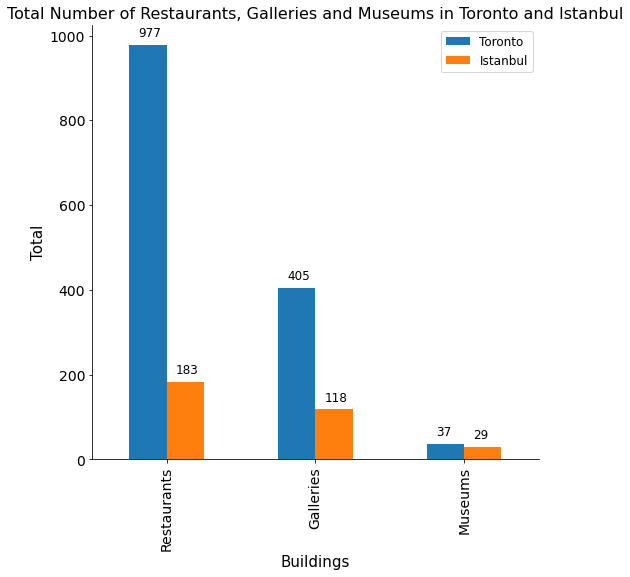

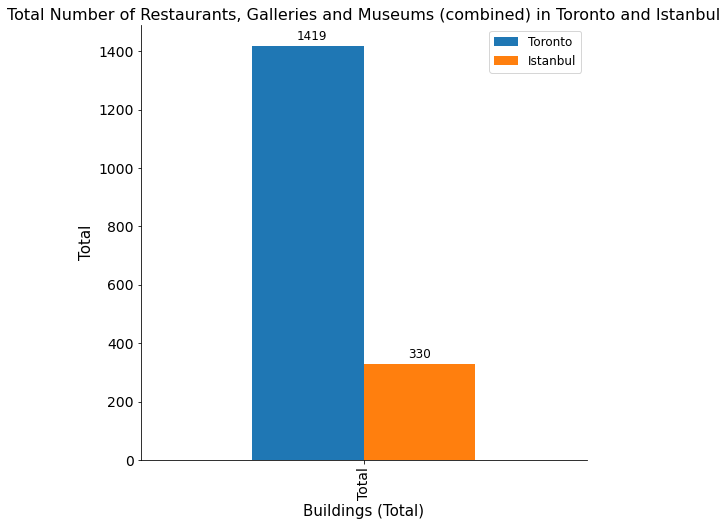

In [98]:
#Set bar chart

ax = df_total_compiled_f.loc[['Restaurants','Galleries','Museums']].plot(kind = 'bar',figsize=(8, 8),fontsize = 14)
ax_total = df_total_compiled_f.loc[['Total']].plot(kind = 'bar',figsize=(8, 8),fontsize = 14)

#Set bar chart title
ax.set_title('Total Number of Restaurants, Galleries and Museums in Toronto and Istanbul',fontsize = 16)
ax_total.set_title('Total Number of Restaurants, Galleries and Museums (combined) in Toronto and Istanbul',fontsize = 16)

# add labels to axes
ax.set_xlabel('Buildings', fontsize=15)
ax.set_ylabel('Total', fontsize=15)

ax_total.set_xlabel('Buildings (Total)', fontsize=15)
ax_total.set_ylabel('Total', fontsize=15)

#add legends
ax.legend(fontsize=12)
ax_total.legend(fontsize=12)

#Removing borders of left, right and top
borders = ["top","right"]

for b in borders:
    ax.spines[b].set_visible(False)
    ax_total.spines[b].set_visible(False)

    
# set individual bar labels in the bar chart
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.06, i.get_height()+20, \
            str(round(i.get_height())), fontsize=12,
                color='black')
for i in ax_total.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax_total.text(i.get_x()+0.10, i.get_height()+20, \
            str(round(i.get_height())), fontsize=12,
                color='black')


## 4.2 Study on the Distributions of Restaurants, Galleries and Museums in both Location (District/ Borough)

Here, the study on the distributions of restaurants, galleries and museums based on districts/ boroughs are aggregated in the form of dataframes for comprehension. 

### 4.2.1 Toronto

In [32]:
df_toronto_group_res = df_toronto_res.groupby('Neighborhood').count()

df_toronto_group_res["Venue"]= round(df_toronto_group_res["Venue"]/df_toronto_group_res["Venue"].sum(),3)*100

df_toronto_final_res = df_toronto_group_res.rename(columns={"Venue": "Distribution of Restaurants (%)"})
df_toronto_final_res.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'])

,Distribution of Restaurants (%)
Neighborhood,
Downtown Toronto,22.6
East Toronto,4.8
East York,11.0
Etobicoke,8.4
North York,28.6
Scarborough,15.6
West Toronto,4.1
York,4.8


In [33]:
df_toronto_group_gal = df_toronto_gal.groupby('Neighborhood').count()

df_toronto_group_gal["Venue"]= round(df_toronto_group_gal["Venue"]/df_toronto_group_gal["Venue"].sum(),3)*100

df_toronto_final_gal = df_toronto_group_gal.rename(columns={"Venue": "Distribution of Galleries (%)"})
df_toronto_final_gal.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'])

,Distribution of Galleries (%)
Neighborhood,
Downtown Toronto,22.0
East Toronto,5.2
East York,10.0
Etobicoke,6.5
North York,32.2
Scarborough,15.0
West Toronto,5.1
York,4.0


In [34]:
df_toronto_group_meu = df_toronto_meu.groupby('Neighborhood').count()

df_toronto_group_meu["Venue"]= round(df_toronto_group_meu["Venue"]/df_toronto_group_meu["Venue"].sum(),3)*100

df_toronto_final_meu = df_toronto_group_meu.rename(columns={"Venue": "Distribution of Museums (%)"})
df_toronto_final_meu.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'])

,Distribution of Museums (%)
Neighborhood,
Downtown Toronto,25.6
East Toronto,3.9
East York,13.0
Etobicoke,9.2
North York,27.1
Scarborough,13.5
West Toronto,1.0
York,6.8


Now, we merge the distribution datas of Restaurants, Museums and Galleries of Toronto into a single dataframe as compilation.

In [35]:
#To create dummy dataframe to extract Neighborhood data for reference
ddf =  df_toronto_final_meu.reset_index()

#To create dataframe for compilation
df_dist_toronto = pd.DataFrame(columns=['Distribution of Restaurants (%)','Distribution of Galleries (%)','Distribution of Museums (%)'], 
                              index=[ddf['Neighborhood']])

#Inserting relevant compiled data into the dataframe
#df_dist_toronto['Neighborhood']=ddf['Neighborhood']
df_dist_toronto["Distribution of Restaurants (%)"]=np.array(df_toronto_final_res["Distribution of Restaurants (%)"])
df_dist_toronto["Distribution of Galleries (%)"]=np.array(df_toronto_final_gal["Distribution of Galleries (%)"])
df_dist_toronto["Distribution of Museums (%)"]=np.array(df_toronto_final_meu["Distribution of Museums (%)"])

#Displaying compiled datafram
df_dist_toronto

,Distribution of Restaurants (%),Distribution of Galleries (%),Distribution of Museums (%)
Neighborhood,,,
Downtown Toronto,22.6,22.0,25.6
East Toronto,4.8,5.2,3.9
East York,11.0,10.0,13.0
Etobicoke,8.4,6.5,9.2
North York,28.6,32.2,27.1
Scarborough,15.6,15.0,13.5
West Toronto,4.1,5.1,1.0
York,4.8,4.0,6.8


Now, let's create pie charts to visualize the distributions of restaurants, galleries and museums in Toronto

(-1.1611222652987157,
 1.1933338549934578,
 -1.1945811053261368,
 1.1839027484573947)

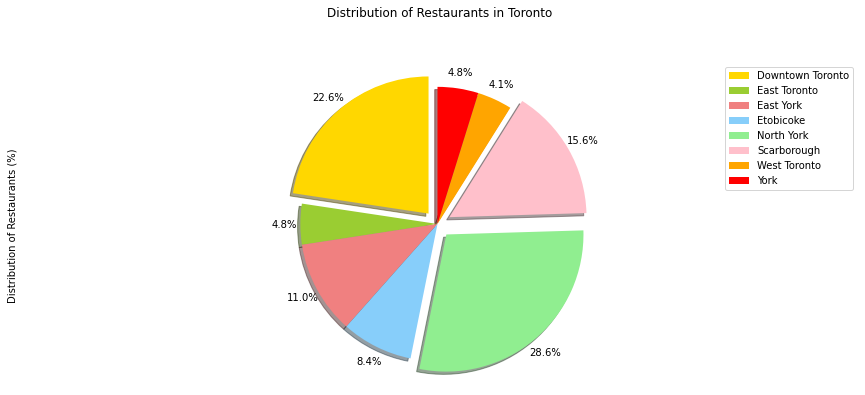

In [38]:
#Creating pie charts for better visualisation (Distribution Data)
df_dist_toronto.plot.pie(y='Distribution of Restaurants (%)', figsize=(15, 6),autopct='%1.1f%%', 
                         startangle=90,
                         labels= None,
                         shadow=True, 
                         colors =['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','orange','red'],
                         explode = [0.1,0.0,0.0,0.0,0.1,0.1,0.0,0.0],
                         pctdistance=1.12)

# add legend, title and scaling
plt.legend(labels=ddf['Neighborhood'], loc='upper right')
plt.title('Distribution of Restaurants in Toronto', y=1.12) 
plt.axis('equal') 

(-1.1525708252194986,
 1.1913350733568546,
 -1.2027562571519888,
 1.1856135903100267)

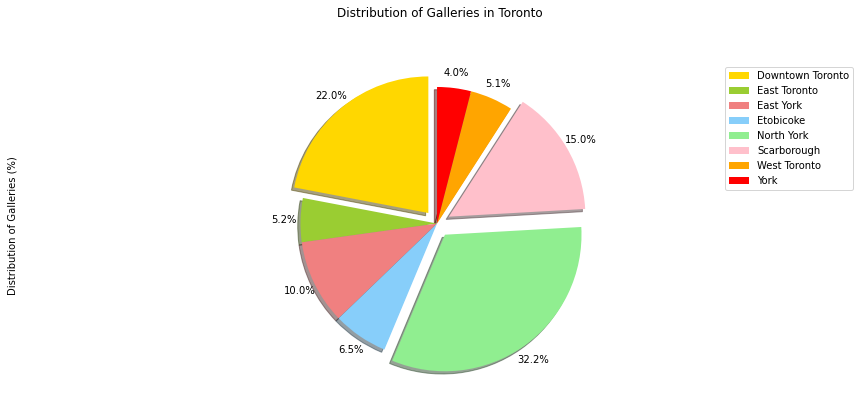

In [39]:
df_dist_toronto.plot.pie(y='Distribution of Galleries (%)', figsize=(15, 6),autopct='%1.1f%%', 
                         startangle=90,
                         labels= None,
                         shadow=True, 
                         colors =['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','orange','red'],
                         explode = [0.1,0.0,0.0,0.0,0.1,0.1,0.0,0.0],
                         pctdistance=1.12)

# add legend, title and scaling
plt.legend(labels=ddf['Neighborhood'], loc='upper right')
plt.title('Distribution of Galleries in Toronto', y=1.12) 
plt.axis('equal') 

(-1.1844997831241466,
 1.1987105387907482,
 -1.1585716517125362,
 1.1755181747224854)

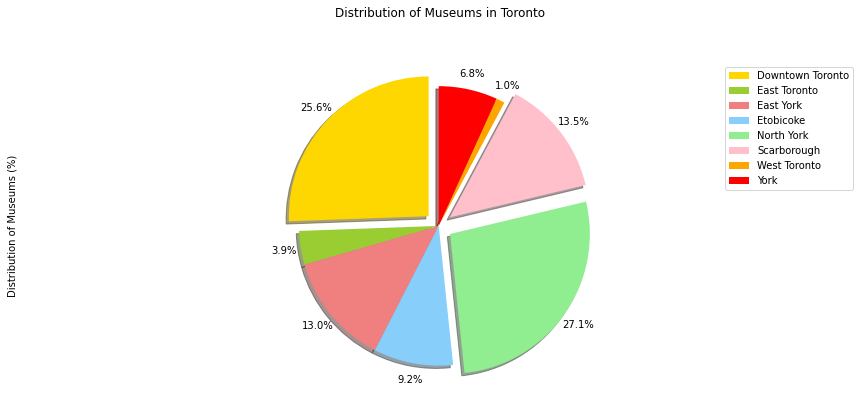

In [40]:
df_dist_toronto.plot.pie(y='Distribution of Museums (%)', figsize=(15, 6),autopct='%1.1f%%', 
                         startangle=90,
                         labels= None,
                         shadow=True, 
                         colors =['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','orange','red'],
                         explode = [0.1,0.0,0.0,0.0,0.1,0.1,0.0,0.0],
                         pctdistance=1.12)

# add legend, title and scaling
plt.legend(labels=ddf['Neighborhood'], loc='upper right')
plt.title('Distribution of Museums in Toronto', y=1.12) 
plt.axis('equal') 

### 4.2.2 Istanbul

In [41]:
df_istanbul_group_res = df_istanbul_res.groupby('Neighborhood').count()

df_istanbul_group_res["Venue"]= round(df_istanbul_group_res["Venue"]/df_istanbul_group_res["Venue"].sum(),3)*100

df_istanbul_final_res = df_istanbul_group_res.rename(columns={"Venue": "Distribution of Restaurants (%)"})
df_istanbul_final_res.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'])

,Distribution of Restaurants (%)
Neighborhood,
Atasehir,2.9
Bakirkoy,2.9
Besiktas,11.5
Beykoz,3.3
Beyoglu,10.5
Fatih,10.0
Kadikoy,12.4
Kartal,3.8
Maltepe,2.9


In [42]:
df_istanbul_group_gal = df_istanbul_gal.groupby('Neighborhood').count()

df_istanbul_group_gal["Venue"]= round(df_istanbul_group_gal["Venue"]/df_istanbul_group_gal["Venue"].sum(),3)*100

df_istanbul_final_gal = df_istanbul_group_gal.rename(columns={"Venue": "Distribution of Galleries (%)"})
df_istanbul_final_gal.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'])

,Distribution of Galleries (%)
Neighborhood,
Atasehir,3.6
Bakirkoy,3.6
Besiktas,16.2
Beykoz,3.6
Beyoglu,10.2
Fatih,7.8
Kadikoy,10.8
Kartal,4.2
Maltepe,4.2


In [63]:
df_istanbul_group_meu = df_istanbul_meu.groupby('Neighborhood').count()

df_istanbul_group_meu["Venue"]= round(df_istanbul_group_meu["Venue"]/df_istanbul_group_meu["Venue"].sum(),3)*100

df_istanbul_final_meu = df_istanbul_group_meu.rename(columns={"Venue": "Distribution of Museums (%)"})
df_istanbul_final_meu.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'])

,Distribution of Museums (%)
Neighborhood,
Atasehir,5.6
Bakirkoy,2.8
Besiktas,27.8
Beykoz,2.8
Beyoglu,8.3
Fatih,5.6
Kadikoy,16.7
Kartal,2.8
Maltepe,2.8


In [64]:
#To create dummy dataframe to extract Neighborhood data for reference
ddf =  df_istanbul_final_meu.reset_index()

#To create dataframe for compilation
df_dist_istanbul = pd.DataFrame(columns=['Distribution of Restaurants (%)','Distribution of Galleries (%)','Distribution of Museums (%)'], 
                              index=[ddf['Neighborhood']])

#Inserting relevant compiled data into the dataframe
#df_dist_istanbul['Neighborhood']=ddf['Neighborhood']
df_dist_istanbul["Distribution of Restaurants (%)"]=np.array(df_istanbul_final_res["Distribution of Restaurants (%)"])
df_dist_istanbul["Distribution of Galleries (%)"]=np.array(df_istanbul_final_gal["Distribution of Galleries (%)"])
df_dist_istanbul["Distribution of Museums (%)"]=np.array(df_istanbul_final_meu["Distribution of Museums (%)"])

#Displaying compiled datafram
df_dist_istanbul

,Distribution of Restaurants (%),Distribution of Galleries (%),Distribution of Museums (%)
Neighborhood,,,
Atasehir,2.9,3.6,5.6
Bakirkoy,2.9,3.6,2.8
Besiktas,11.5,16.2,27.8
Beykoz,3.3,3.6,2.8
Beyoglu,10.5,10.2,8.3
Fatih,10.0,7.8,5.6
Kadikoy,12.4,10.8,16.7
Kartal,3.8,4.2,2.8
Maltepe,2.9,4.2,2.8


Now, let's create pie charts to visualize the distributions of restaurants, galleries and museums in Istanbul. 

(-1.1634933304778428,
 1.2083508800454232,
 -1.2168736620577267,
 1.2098910964071097)

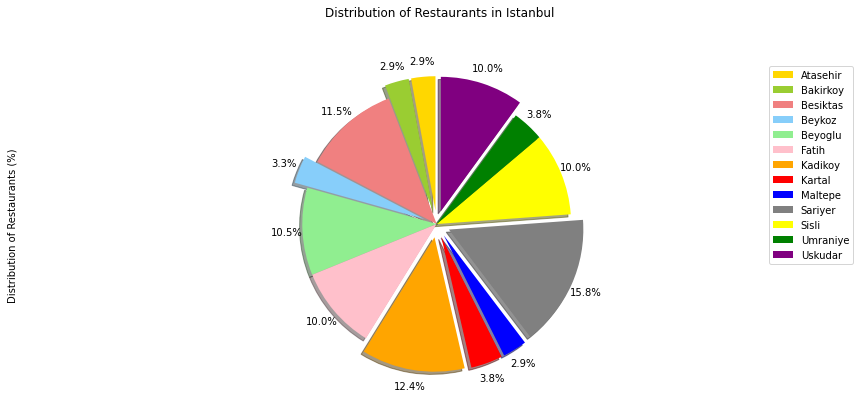

In [77]:
#Creating pie charts for better visualisation (Distribution Data)
df_dist_istanbul.plot.pie(y='Distribution of Restaurants (%)', figsize=(15, 6),autopct='%1.1f%%', 
                         startangle=90,
                         labels= None,
                         shadow=True, 
                         colors =['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','orange','red','blue','grey','yellow','green','purple'],
                         explode = [0.1,0.1,0.0,0.1,0.0,0.0,0.1,0.1,0.1,0.1,0.0,0.0,0.1],
                         pctdistance=1.12)

# add legend, title and scaling
plt.legend(labels=ddf['Neighborhood'], loc='upper right')
plt.title('Distribution of Restaurants in Istanbul', y=1.12) 
plt.axis('equal')

(-1.2107287897020744,
 1.218587465165033,
 -1.2119985354254657,
 1.2094285433457455)

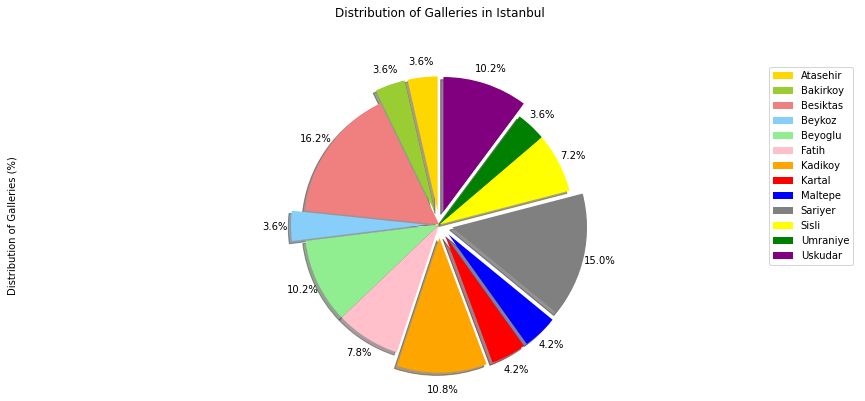

In [78]:
#Creating pie charts for better visualisation (Distribution Data)
df_dist_istanbul.plot.pie(y='Distribution of Galleries (%)', figsize=(15, 6),autopct='%1.1f%%', 
                         startangle=90,
                         labels= None,
                         shadow=True, 
                         colors =['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','orange','red','blue','grey','yellow','green','purple'],
                         explode = [0.1,0.1,0.0,0.1,0.0,0.0,0.1,0.1,0.1,0.1,0.0,0.0,0.1],
                         pctdistance=1.12)

# add legend, title and scaling
plt.legend(labels=ddf['Neighborhood'], loc='upper right')
plt.title('Distribution of Galleries in Istanbul', y=1.12) 
plt.axis('equal')

(-1.115689651711033,
 1.2052248475639398,
 -1.1691443276377924,
 1.2064438548062386)

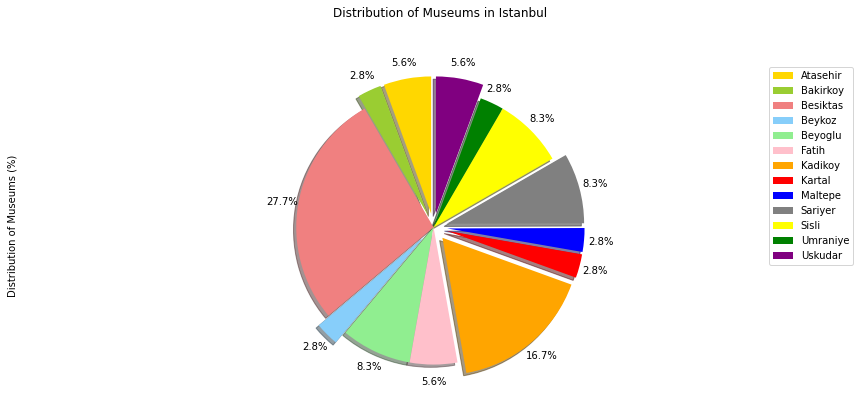

In [79]:
#Creating pie charts for better visualisation (Distribution Data)
df_dist_istanbul.plot.pie(y='Distribution of Museums (%)', figsize=(15, 6),autopct='%1.1f%%', 
                         startangle=90,
                         labels= None,
                         shadow=True, 
                         colors =['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','orange','red','blue','grey','yellow','green','purple'],
                         explode = [0.1,0.1,0.0,0.1,0.0,0.0,0.1,0.1,0.1,0.1,0.0,0.0,0.1],
                         pctdistance=1.12)

# add legend, title and scaling
plt.legend(labels=ddf['Neighborhood'], loc='upper right')
plt.title('Distribution of Museums in Istanbul', y=1.12) 
plt.axis('equal')

# 5.0 Results and Discussion

By accessing the distributions of restaurants, galleries and museums of both location of interest in **section 4.2**, we can see that the data trends of each distinctive boroughs/ districts for restaurants, galleries and museums are distincitve for Toronto but equally distributed for Istanbul. The boroughs of **Downtown Toronto**, **North York** and **Scarborough** are the top 3 boroughs with high numbers of restaurants, galleries and museums. Whereas, the notable districts with fairly similar distributions and total numbers of restaurants, galleries and museums are **Kadikoy**, **Besiktas**, **Sariyer**. Hence, these boroughs/ districts in both location of interest with higher numbers of restaurants, galleries and museums could be regarded as the respective tourist spots.

However, such findings might not be a reliable source of results due to the following areas of concern during study:
* Number of boroughs/ districts of both locations included in the case study scope (Toronto > Istanbul).
* Scale differences in terms of registered entities (i.e. restaurants, galleries and museums) in Foursquare API in both locatons.
* The accuracy of geospatial datas extracted from GeoPy's Geocoder and Foursquare API.
* The limitations of query ability in Foursquare API due to vast amount of posibilities in terms of data query 



# 6.0 Conclusion

From our findings, it has come to a conclusion where **Toronto** has significantly higher number of restaurants, galleries and museums than that of the **Istanbul** based on the study scope. Therefore, we can say that **Toronto** has a higher potentiality than **Istanbul** as city with higher welcoming rate in tourism. However, such findings could differ due to factors such as cultural reception, demography differences in terms of races, culture and economy in different continents etc.